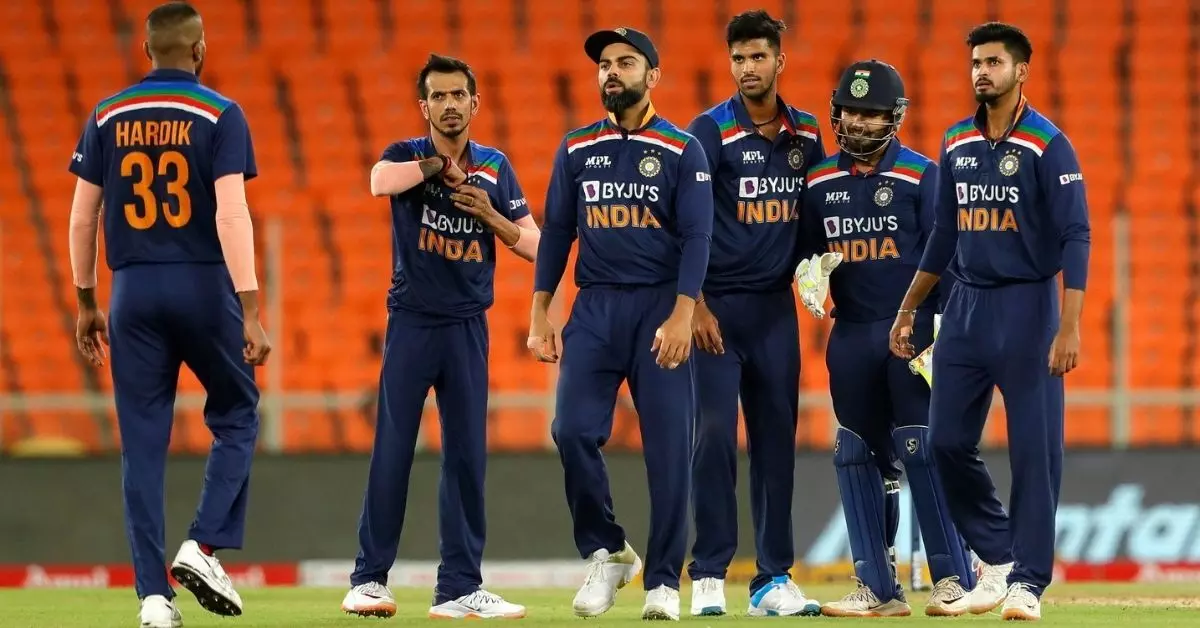

## Import required libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import math
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats as sts

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

## Loading the datasets:
- Ball by ball
- Player & Country
- Player & Bowling type

In [2]:
df = pd.read_csv('ipl_ball_by_ball_data.csv')
cntry_df = pd.read_csv('player_country.csv')
bowltype_df = pd.read_csv('indians_bowling_type.csv')

## Filtering IPL data: 2016 - 2021

In [3]:
df['start_date'] = pd.to_datetime(df['start_date'])
df['year'] = df['start_date'].dt.year
df = df[(df.year >= 2016) & (df.year <= 2021)]
df.reset_index(inplace = True, drop = True)

## Calculate Total balls played & Balls per Wicket:

In [4]:
balls = pd.DataFrame(df.groupby('striker')['ball'].count()).reset_index().rename(columns = {'ball':'balls', 'striker':'playerName'})

In [5]:
balls.sort_values('balls', ascending = False).head(10)

playerName  balls
217  S Dhawan        2315 
264  V Kohli         2197 
56   DA Warner       2145 
125  KL Rahul        1928 
206  RG Sharma       1665 
210  RR Pant         1595 
8    AB de Villiers  1585 
244  SV Samson       1545 
155  MK Pandey       1544 
17   AM Rahane       1447

In [6]:
no_of_balls = balls.sort_values('balls', ascending = False).head(10)
no_of_balls.reset_index(inplace = True, drop = True)

In [7]:
list(no_of_balls.playerName)

['S Dhawan',
 'V Kohli',
 'DA Warner',
 'KL Rahul',
 'RG Sharma',
 'RR Pant',
 'AB de Villiers',
 'SV Samson',
 'MK Pandey',
 'AM Rahane']

In [8]:
virat_df = df[df.striker == 'V Kohli']

In [9]:
outs = pd.DataFrame(df['player_dismissed'].value_counts()).reset_index().rename(columns = {'player_dismissed':'dismissals', 'index':'playerName'})

In [10]:
outs = outs[outs.dismissals >= 1]

In [11]:
bpw_df = balls.merge(outs, on = 'playerName', how = 'left')

In [12]:
bpw_df['bpw'] = bpw_df['balls']/bpw_df['dismissals']

In [13]:
bpw_df = bpw_df.fillna(0)
bpw_df = bpw_df.merge(cntry_df, on = 'playerName')
bpw_df = bpw_df[bpw_df.country == 'India']

In [14]:
# min 500 balls
bpw_df[bpw_df.balls > 500].sort_values('bpw', ascending = False).head(10)

playerName  balls  dismissals        bpw country
125  KL Rahul    1928   51.0        37.803922  India 
264  V Kohli     2197   64.0        34.328125  India 
163  MS Dhoni    1326   40.0        33.150000  India 
75   G Gambhir   920    30.0        30.666667  India 
217  S Dhawan    2315   76.0        30.460526  India 
155  MK Pandey   1544   53.0        29.132075  India 
53   D Padikkal  533    20.0        26.650000  India 
202  RA Jadeja   712    27.0        26.370370  India 
24   AT Rayudu   1441   55.0        26.200000  India 
273  YK Pathan   637    25.0        25.480000  India

In [15]:
plot_bpw = bpw_df[bpw_df.balls > 500].sort_values('bpw', ascending = False).head(10).reset_index(drop = True)

In [16]:
plot_bpw

playerName  balls  dismissals        bpw country
0  KL Rahul    1928   51.0        37.803922  India 
1  V Kohli     2197   64.0        34.328125  India 
2  MS Dhoni    1326   40.0        33.150000  India 
3  G Gambhir   920    30.0        30.666667  India 
4  S Dhawan    2315   76.0        30.460526  India 
5  MK Pandey   1544   53.0        29.132075  India 
6  D Padikkal  533    20.0        26.650000  India 
7  RA Jadeja   712    27.0        26.370370  India 
8  AT Rayudu   1441   55.0        26.200000  India 
9  YK Pathan   637    25.0        25.480000  India

In [17]:
p3 = bpw_df[bpw_df.balls > 500].sort_values('bpw', ascending = False).head(20)
p3.reset_index(inplace = True, drop = True)

In [18]:
p3.head(1)

playerName  balls  dismissals        bpw country
0  KL Rahul   1928   51.0        37.803922  India

In [19]:
runs_df = pd.DataFrame(df.groupby('striker')['runs_off_bat'].sum()).reset_index().rename(columns = {'runs_off_bat':'runs', 'striker':'playerName'})

In [20]:
runs_df.sort_values('runs', ascending = False).head()

playerName  runs
217  S Dhawan        2996
264  V Kohli         2944
56   DA Warner       2924
125  KL Rahul        2656
8    AB de Villiers  2492

In [21]:
rohit_df = df[df.striker == 'RG Sharma']

In [22]:
sr_df = runs_df.merge(balls, on = 'playerName', how = 'left')

In [23]:
sr_df['sr'] = 100*sr_df['runs']/sr_df['balls']

In [24]:
sr_df = sr_df.merge(cntry_df, on = 'playerName', how = 'left')
sr_df = sr_df[sr_df.country == 'India']

In [25]:
sr_df.merge(bpw_df[['playerName', 'bpw']], on = 'playerName', how = 'left').head()

playerName  runs  balls          sr country   bpw
0  A Ashish Reddy  47    30     156.666667  India   15.0
1  A Choudhary     25    20     125.000000  India   20.0
2  A Mishra        75    98     76.530612   India   19.6
3  A Nehra         1     1      100.000000  India   0.0 
4  AB Dinda        7     8      87.500000   India   8.0

## Find out dots, fours, sixes:

In [26]:
df['isFour'] = df['runs_off_bat'].apply(lambda x: 1 if x == 4 else 0)
df['isSix'] = df['runs_off_bat'].apply(lambda x: 1 if x == 6 else 0)
df['isDot'] = df['runs_off_bat'].apply(lambda x: 1 if x == 0 else 0)

In [27]:
fours_df = pd.DataFrame(df.groupby('striker')['isFour'].sum()).reset_index().rename(columns = {'isFour':'fours', 'striker':'playerName'})
sixes_df = pd.DataFrame(df.groupby('striker')['isSix'].sum()).reset_index().rename(columns = {'isSix':'sixes', 'striker':'playerName'})

In [28]:
fours_df.head(1)

playerName  fours
0  A Ashish Reddy  2

In [29]:
sixes_df.head(1)

playerName  sixes
0  A Ashish Reddy  4

In [30]:
fours_df = fours_df[fours_df.fours > 1]
sixes_df = sixes_df[sixes_df.sixes > 1]

In [31]:
fps_df = fours_df.merge(sixes_df, on = 'playerName', how = 'left')

In [32]:
fps_df['fps'] = fps_df['fours']/fps_df['sixes']

In [33]:
fps_df['spf'] = 1/fps_df['fps']

In [34]:
fps_df.sort_values('spf', ascending = False).head(15)

playerName  fours  sixes       fps       spf
153  SE Rutherford   2      7.0    0.285714  3.500000
40   DL Chahar       2      6.0    0.333333  3.000000
23   Bipul Sharma    3      6.0    0.500000  2.000000
0    A Ashish Reddy  2      4.0    0.500000  2.000000
32   CR Brathwaite   10     16.0   0.625000  1.600000
119  NLTC Perera     7      11.0   0.636364  1.571429
6    AD Russell      80     120.0  0.666667  1.500000
146  Rashid Khan     9      12.0   0.750000  1.333333
56   HV Patel        6      8.0    0.750000  1.333333
66   JC Archer       11     14.0   0.785714  1.272727
158  SO Hetmyer      20     25.0   0.800000  1.250000
30   CJ Anderson     8      10.0   0.800000  1.250000
43   DT Christian    5      6.0    0.833333  1.200000
22   BCJ Cutting     15     18.0   0.833333  1.200000
80   KA Pollard      90     103.0  0.873786  1.144444

In [35]:
spf_df = fps_df.merge(cntry_df, on = 'playerName', how = 'left')
spf_df = spf_df[spf_df.country == 'India']

In [36]:
spf_df[(spf_df.fours > 100) & (spf_df.sixes > 50)].sort_values('fps', ascending = False).head(15)

playerName  fours  sixes       fps       spf country
148  S Dhawan      337    63.0   5.349206  0.186944  India 
154  SK Raina      181    52.0   3.480769  0.287293  India 
81   KD Karthik    172    52.0   3.307692  0.302326  India 
180  V Kohli       250    95.0   2.631579  0.380000  India 
141  RG Sharma     202    78.0   2.589744  0.386139  India 
104  MK Pandey     148    58.0   2.551724  0.391892  India 
164  SS Iyer       149    62.0   2.403226  0.416107  India 
145  RV Uthappa    158    67.0   2.358209  0.424051  India 
84   KL Rahul      237    112.0  2.116071  0.472574  India 
144  RR Pant       210    107.0  1.962617  0.509524  India 
117  N Rana        148    81.0   1.827160  0.547297  India 
14   AT Rayudu     144    81.0   1.777778  0.562500  India 
167  SV Samson     157    96.0   1.635417  0.611465  India 
63   Ishan Kishan  103    66.0   1.560606  0.640777  India

In [37]:
dots_df = pd.DataFrame(df.groupby('striker')['isDot'].sum()).reset_index().rename(columns = {'isDot':'dots', 'striker':'playerName'})

In [38]:
dbp_df = balls.merge(dots_df, on = 'playerName', how = 'left')

In [39]:
dbp_df['dbp'] = dbp_df['dots']/dbp_df['balls']

In [40]:
dbp_df = dbp_df.merge(cntry_df, on = 'playerName', how = 'left')
dbp_df = dbp_df[dbp_df.country == 'India']

In [41]:
dbp_df[dbp_df.balls > 200].sort_values('dbp', ascending = False).head(10)

playerName  balls  dots       dbp country
146  M Vohra            396    184   0.464646  India 
275  Yuvraj Singh       528    239   0.452652  India 
177  NV Ojha            216    94    0.435185  India 
145  M Vijay            489    206   0.421268  India 
218  S Dube             273    115   0.421245  India 
172  N Rana             1261   529   0.419508  India 
270  Washington Sundar  202    84    0.415842  India 
185  PA Patel           851    351   0.412456  India 
126  KM Jadhav          525    216   0.411429  India 
211  RV Uthappa         1239   497   0.401130  India

In [42]:
p_list = ['N Rana', 'Ishan Kishan', 'RG Sharma', 'D Padikkal', 'RD Gaikwad', 'PP Shaw', 'RA Tripathi']

In [43]:
plot_dots = dbp_df[(dbp_df.balls > 200) & (dbp_df.playerName.isin(p_list))].sort_values('dbp', ascending = False).head(20)

In [44]:
plot_dots

playerName  balls  dots       dbp country
172  N Rana        1261   529   0.419508  India 
95   Ishan Kishan  996    398   0.399598  India 
206  RG Sharma     1665   656   0.393994  India 
53   D Padikkal    533    207   0.388368  India 
205  RD Gaikwad    328    127   0.387195  India 
190  PP Shaw       793    307   0.387137  India 
203  RA Tripathi   894    342   0.382550  India

In [45]:
df.head()

match_id  season start_date             venue  innings  ball             batting_team             bowling_team       striker   non_striker          bowler  runs_off_bat  extras  wides  noballs  byes  legbyes  penalty wicket_type player_dismissed  other_wicket_type  other_player_dismissed  year  isFour  isSix  isDot
0  980901    2016   2016-04-09  Wankhede Stadium  1        5.3   Mumbai Indians           Rising Pune Supergiants  KA Pollard    AT Rayudu     I Sharma        0             5       5.0   NaN      NaN   NaN      NaN       NaN         NaN             NaN                NaN                      2016  0       0      1    
1  980901    2016   2016-04-09  Wankhede Stadium  1        0.1   Mumbai Indians           Rising Pune Supergiants  LMP Simmons   RG Sharma     RP Singh        1             0      NaN    NaN      NaN   NaN      NaN       NaN         NaN             NaN                NaN                      2016  0       0      0    
2  980901    2016   2016-04-09  Wankhede Stadium  2        2.2   Rising Pune Supergiants  Mumbai Indians           F du Plessis  AM Rahane     MJ McClenaghan  0             0      NaN    NaN      NaN   NaN      NaN       NaN         NaN             NaN                NaN                      2016  0       0      1    
3  980901    2016   2016-04-09  Wankhede Stadium  2        2.3   Rising Pune Supergiants  Mumbai Indians           F du Plessis  AM Rahane     MJ McClenaghan  1             0      NaN    NaN      NaN   NaN      NaN       NaN         NaN             NaN                NaN                      2016  0       0      0    
4  980901    2016   2016-04-09  Wankhede Stadium  2        2.4   Rising Pune Supergiants  Mumbai Indians           AM Rahane     F du Plessis  MJ McClenaghan  4             0      NaN    NaN      NaN   NaN      NaN       NaN         NaN             NaN                NaN                      2016  1       0      0

In [46]:
def get_phase(ball):
    ball = str(ball)
    ball_ls = ball.split('.')
    if int(ball_ls[0]) <= 5:
        return 'Powerplay'
    elif int(ball_ls[0]) <= 15:
        return 'Middle'
    else:
        return 'Death'

In [47]:
df['phase'] = df['ball'].apply(lambda x: get_phase(x))

In [48]:
bowltype_df['bowler'] = bowltype_df['playerName'].apply(lambda x: x)

In [49]:
df = df.merge(bowltype_df, on = 'bowler', how = 'left')

In [50]:
df.head()

match_id  season start_date             venue  innings  ball             batting_team             bowling_team       striker   non_striker          bowler  runs_off_bat  extras  wides  noballs  byes  legbyes  penalty wicket_type player_dismissed  other_wicket_type  other_player_dismissed  year  isFour  isSix  isDot      phase playerName country bowlType
0  980901    2016   2016-04-09  Wankhede Stadium  1        5.3   Mumbai Indians           Rising Pune Supergiants  KA Pollard    AT Rayudu     I Sharma        0             5       5.0   NaN      NaN   NaN      NaN       NaN         NaN             NaN                NaN                      2016  0       0      1      Powerplay  I Sharma   India   Pace   
1  980901    2016   2016-04-09  Wankhede Stadium  1        0.1   Mumbai Indians           Rising Pune Supergiants  LMP Simmons   RG Sharma     RP Singh        1             0      NaN    NaN      NaN   NaN      NaN       NaN         NaN             NaN                NaN                      2016  0       0      0      Powerplay  NaN        NaN     NaN    
2  980901    2016   2016-04-09  Wankhede Stadium  2        2.2   Rising Pune Supergiants  Mumbai Indians           F du Plessis  AM Rahane     MJ McClenaghan  0             0      NaN    NaN      NaN   NaN      NaN       NaN         NaN             NaN                NaN                      2016  0       0      1      Powerplay  NaN        NaN     NaN    
3  980901    2016   2016-04-09  Wankhede Stadium  2        2.3   Rising Pune Supergiants  Mumbai Indians           F du Plessis  AM Rahane     MJ McClenaghan  1             0      NaN    NaN      NaN   NaN      NaN       NaN         NaN             NaN                NaN                      2016  0       0      0      Powerplay  NaN        NaN     NaN    
4  980901    2016   2016-04-09  Wankhede Stadium  2        2.4   Rising Pune Supergiants  Mumbai Indians           AM Rahane     F du Plessis  MJ McClenaghan  4             0      NaN    NaN      NaN   NaN      NaN       NaN         NaN             NaN                NaN                      2016  1       0      0      Powerplay  NaN        NaN     NaN

In [51]:
mid_sr = df[(df.phase == 'Middle') & (df.bowlType == 'Spin')]

ms1 = pd.DataFrame(mid_sr.groupby('striker')['runs_off_bat'].sum()).reset_index().rename(columns = {'runs_off_bat':'runs'})
ms2 = pd.DataFrame(mid_sr.groupby('striker')['runs_off_bat'].count()).reset_index().rename(columns = {'runs_off_bat':'balls'})
ms3 = ms1.merge(ms2, on = 'striker', how = 'left')
ms3 = ms3[ms3.balls > 150]

ms3['strike_rate'] = 100*ms3['runs']/ms3['balls']

In [52]:
p2_list = ['V Kohli', 'S Dhawan', 'RG Sharma', 'KL Rahul']
rms3 = ms3[ms3.striker.isin(p2_list)]

In [53]:
death_sr = df[(df.phase == 'Death')]

ds1 = pd.DataFrame(death_sr.groupby('striker')['runs_off_bat'].sum()).reset_index().rename(columns = {'runs_off_bat':'runs'})
ds2 = pd.DataFrame(death_sr.groupby('striker')['runs_off_bat'].count()).reset_index().rename(columns = {'runs_off_bat':'balls'})
ds3 = ds1.merge(ds2, on = 'striker', how = 'left')
ds3 = ds3[ds3.balls > 150]

ds3['strike_rate'] = 100*ds3['runs']/ds3['balls']

ds3 = ds3.rename(columns = {'striker':'playerName'})

ds3 = ds3.merge(cntry_df, on = 'playerName', how = 'left')

ds3 = ds3[ds3['country'] == 'India']

ds3.reset_index(inplace = True, drop = True)



ppdf = df[df.phase == 'Powerplay']

pp1 = pd.DataFrame(ppdf.groupby(['bowler'])['match_id'].nunique()).reset_index().rename(columns = {'match_id':'matches'})
pp2 = pd.DataFrame(ppdf.groupby(['bowler'])['ball'].count()).reset_index().rename(columns = {'ball': 'powerplay_balls'})
pp3 = pp1.merge(pp2, on = 'bowler', how = 'left')

ppec1 = pd.DataFrame(ppdf.groupby(['bowler'])['runs_off_bat'].sum()).reset_index()
ppec2 = pd.DataFrame(ppdf.groupby(['bowler'])['extras'].sum()).reset_index()

ppec3 = ppec1.merge(ppec2, on = 'bowler')

ppec3['total_runs'] = ppec3['runs_off_bat'] + ppec3['extras']

ppec3 = ppec3.rename(columns = {'bowler':'playerName'})

pp3['total_balls'] = pp3['matches']*4*6

pp3['pp_percentage'] = pp3['powerplay_balls']/pp3['total_balls']

pp3 = pp3.rename(columns = {'bowler':'playerName'})
pp3 = pp3.merge(cntry_df, on = 'playerName')
pp3 = pp3[pp3.country == 'India']

pp3 = pp3.merge(bowltype_df[['playerName', 'bowlType']], on = 'playerName')

pp3 = pp3.merge(ppec3[['playerName', 'total_runs']], on = 'playerName', how = 'left')

pp3['economy'] = 6*pp3['total_runs']/pp3['powerplay_balls']

pp3_spin = pp3[pp3.bowlType == 'Spin']

pp3_pace = pp3[pp3.bowlType == 'Pace']

plot_eco_pp_pace = pp3_pace.sort_values('pp_percentage', ascending = False).head(20)
plot_eco_pp_pace['pp_percentage'] = plot_eco_pp_pace['pp_percentage']*100
plot_eco_pp_pace.reset_index(inplace = True, drop = True)

plot_eco_pp = pp3_spin.sort_values('pp_percentage', ascending = False).head(20)
plot_eco_pp['pp_percentage'] = plot_eco_pp['pp_percentage']*100
plot_eco_pp.reset_index(inplace = True, drop = True)

dtdf = df[df.phase == 'Death']

dt1 = pd.DataFrame(dtdf.groupby(['bowler'])['match_id'].nunique()).reset_index().rename(columns = {'match_id':'matches'})
dt2 = pd.DataFrame(dtdf.groupby(['bowler'])['ball'].count()).reset_index().rename(columns = {'ball': 'death_balls'})
dt3 = dt1.merge(dt2, on = 'bowler', how = 'left')

dtec1 = pd.DataFrame(dtdf.groupby(['bowler'])['runs_off_bat'].sum()).reset_index()
dtec2 = pd.DataFrame(dtdf.groupby(['bowler'])['extras'].sum()).reset_index()

dtec3 = dtec1.merge(dtec2, on = 'bowler')

dtec3['total_runs'] = dtec3['runs_off_bat'] + dtec3['extras']

dtec3 = dtec3.rename(columns = {'bowler':'playerName'})

dt2 = dt2.rename(columns = {'bowler':'playerName'})

death_eco = dtec3.merge(dt2, on = 'playerName')

death_eco['economy'] = 6*death_eco['total_runs']/death_eco['death_balls']

death_eco = death_eco.merge(cntry_df, on = 'playerName', how = 'left')

death_eco = death_eco.merge(bowltype_df[['playerName', 'bowlType']], on = 'playerName', how = 'left')

death_eco = death_eco[(death_eco.death_balls > 50) & (death_eco.country == 'India') & (death_eco.bowlType == 'Pace')]

wk_type = ['caught', 'bowled', 'lbw', 'stumped', 'caught and bowled', 'hit wicket']

df['isOut'] = df['player_dismissed'].apply(lambda x: 1 if type(x) == type('str') else 0)

bowl_wk = df[(df.wicket_type.isin(wk_type))]

# pp, death
bowl_wk_death = bowl_wk[bowl_wk.phase == 'Death']
bowl_wk_pp = bowl_wk[bowl_wk.phase == 'Powerplay']
bowl_wk_mid = bowl_wk[bowl_wk.phase == 'Middle']

bowl_wk_death = pd.DataFrame(bowl_wk_death.groupby('bowler')['isOut'].sum()).reset_index().rename(columns = {'isOut':'wickets'})
bowl_wk_pp = pd.DataFrame(bowl_wk_pp.groupby('bowler')['isOut'].sum()).reset_index().rename(columns = {'isOut':'wickets'})

bowl_wk_death = bowl_wk_death.rename(columns = {'bowler':'playerName'})
bowl_wk_pp = bowl_wk_pp.rename(columns = {'bowler':'playerName'})

bowl_wk_death = bowl_wk_death.merge(cntry_df, on = 'playerName', how = 'left')
bowl_wk_death = bowl_wk_death.merge(bowltype_df[['playerName', 'bowlType']], on = 'playerName', how = 'left')

bowl_wk_pp = bowl_wk_pp.merge(cntry_df, on = 'playerName', how = 'left')
bowl_wk_pp = bowl_wk_pp.merge(bowltype_df[['playerName', 'bowlType']], on = 'playerName', how = 'left')

bowl_wk_death = bowl_wk_death[bowl_wk_death.country == 'India']
bowl_wk_pp = bowl_wk_pp[bowl_wk_pp.country == 'India']

bowl_wk_death = bowl_wk_death.sort_values('wickets', ascending = False).head(10)
bowl_wk_death.reset_index(inplace = True, drop = True)

bowl_wk_pp = bowl_wk_pp.sort_values('wickets', ascending = False)
bowl_wk_pp.reset_index(inplace = True, drop = True)

bowl_wk_pp_spin = bowl_wk_pp[bowl_wk_pp.bowlType == 'Spin']
bowl_wk_pp_spin.reset_index(inplace = True, drop = True)

bowl_wk_pp_pace = bowl_wk_pp[bowl_wk_pp.bowlType == 'Pace']
bowl_wk_pp_pace.reset_index(inplace = True, drop = True)

In [54]:
df_pp = df[df.phase == 'Powerplay']

df_pp_runs = pd.DataFrame(df_pp.groupby('striker')['runs_off_bat'].sum()).reset_index().rename(columns = {'runs_off_bat':'runs'})
df_pp_balls = pd.DataFrame(df_pp.groupby('striker')['runs_off_bat'].count()).reset_index().rename(columns = {'runs_off_bat':'balls'})

df_pp_sr = df_pp_balls.merge(df_pp_runs, on = 'striker', how = 'left')
df_pp_sr['strike_rate'] = 100*df_pp_sr['runs'] /df_pp_sr['balls']
df_pp_sr.rename(columns = {'striker':'playerName'}, inplace = True)

df_pp_sr = df_pp_sr.merge(cntry_df, on = 'playerName', how = 'left')
df_pp_sr = df_pp_sr[df_pp_sr.country == 'India']
df_pp_sr = df_pp_sr[df_pp_sr.balls > 300 ].sort_values('strike_rate', ascending = False).head(20)

In [55]:
# plt.figure(figsize = (16, 8))
# plt.subplot(241)
# plt.axhline(15, ls = '--', color = 'grey')
# df[df.bowler == 'Washington Sundar'].groupby('season')['isOut'].sum().plot(kind = 'bar', color = 'g')
# plt.title('W Sundar', fontsize = 10)
# plt.xticks(rotation = 0)
# plt.ylim(0, 35)
# plt.xlabel('')

# plt.subplot(242)
# plt.axhline(15, ls = '--', color = 'grey')
# df[df.bowler == 'YS Chahal'].groupby('season')['isOut'].sum().plot(kind = 'bar', color = 'g')
# plt.title('Y Chahal', fontsize = 10)
# plt.xticks(rotation = 0)
# plt.ylim(0, 35)
# plt.xlabel('')

# plt.subplot(243)
# plt.axhline(15, ls = '--', color = 'grey')
# df[df.bowler == 'R Ashwin'].groupby('season')['isOut'].sum().plot(kind = 'bar', color = 'g')
# plt.title('R Ashwin', fontsize = 10)
# plt.xticks(rotation = 0)
# plt.ylim(0, 35)
# plt.xlabel('')

# plt.subplot(244)
# plt.axhline(15, ls = '--', color = 'grey')
# df[df.bowler == 'AR Patel'].groupby('season')['isOut'].sum().plot(kind = 'bar', color = 'r')
# plt.title('A Patel', fontsize = 10)
# plt.xticks(rotation = 0)
# plt.ylim(0, 35)
# plt.xlabel('')

# plt.subplot(245)
# plt.axhline(15, ls = '--', color = 'grey')
# df[df.bowler == 'RD Chahar'].groupby('season')['isOut'].sum().plot(kind = 'bar', color = 'r')
# plt.title('R Chahar', fontsize = 10)
# plt.xticks(rotation = 0)
# plt.ylim(0, 35)

# plt.subplot(246)
# plt.axhline(15, ls = '--', color = 'grey')
# df[df.bowler == 'CV Varun'].groupby('season')['isOut'].sum().plot(kind = 'bar', color = 'r')
# plt.title('C Varun', fontsize = 10)
# plt.xticks(rotation = 0)
# plt.ylim(0, 35)

# plt.subplot(247)
# plt.axhline(15, ls = '--', color = 'grey')
# df[df.bowler == 'RA Jadeja'].groupby('season')['isOut'].sum().plot(kind = 'bar', color = 'r')
# plt.title('R Jadeja', fontsize = 10)
# plt.xticks(rotation = 0)
# plt.ylim(0, 35)

# plt.subplot(248)
# plt.axhline(15, ls = '--', color = 'grey')
# df[df.bowler == 'R Tewatia'].groupby('season')['isOut'].sum().plot(kind = 'bar', color = 'r')
# plt.title('R Tewatia', fontsize = 10)
# plt.xticks(rotation = 0)
# plt.ylim(0, 35)

# plt.show()

## England XI - Lineup


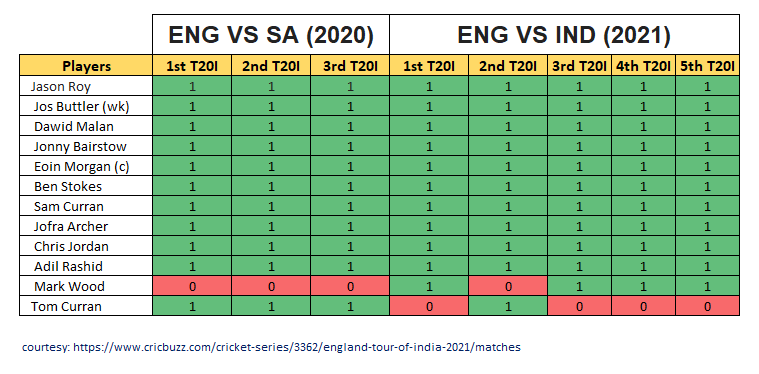

## England playing xi:

1. Jason Roy
2. Jos Buttler (wk)
3. Dawid Malan
4. Jonny Bairstow
5. Eoin Morgan
6. Ben Stokes
7. Sam Curran
8. Jofra Archer
9. Chris Jordan
10. Adil Rahid
11. Mark Wood

### Others:
- Mo Ali, Tom Banton, Joe Denly

## Points to note:
- **4 left handers in Top 7**
    - Need an off-spinner (to counter attack)
  
  
- **Aggressive English players**
  - Need an aggressive Indian line up (less anchors, more attackers)
  
  
- **Mo Ali, Rashid - two spinners**
  - Need middle order players who are good against spin

## India's XI - Exploration:

### Top Order - Mid Order - Lower Mid - Tail

## 1. Top Order:

## Is there a better anchor than Virat?

In [56]:
x1 = list(no_of_balls.balls)
x1.reverse()

y1 = list(no_of_balls.playerName)
y1.reverse()

fig = go.Figure(go.Bar(
            x = x1,
            y = y1,
            orientation='h'))

fig.update_layout(
    title="Players who played most no of balls in IPL 2016 - 2021")

fig.show()

## Best wicket preventors:

In [57]:
x2 = list(plot_bpw.bpw)
x2.reverse()

y2 = list(plot_bpw.playerName)
y2.reverse()

fig = go.Figure(go.Bar(
            x = x2,
            y = y2,
            orientation='h'))

fig.update_layout(
    title="Players with most balls per wicket in IPL 2016 - 2021")

fig.show()

## Summary of Anchors:

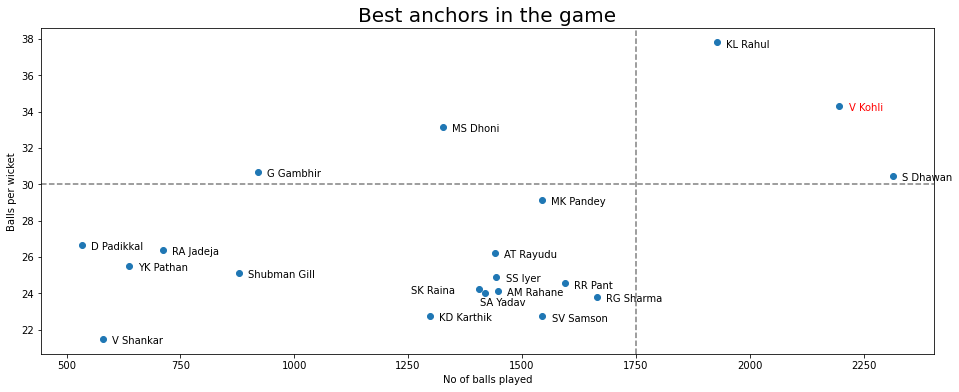

In [58]:
plt.figure(figsize = (16, 6))
plt.scatter(p3.balls, p3.bpw)

for i in range(len(p3)):
    if p3.playerName[i] == 'V Kohli':
        plt.text(p3.balls[i] + 20, p3.bpw[i] - 0.25, p3.playerName[i], color = 'red')
    elif p3.playerName[i] == "SK Raina":
        plt.text(p3.balls[i] - 150, p3.bpw[i] - 0.25, p3.playerName[i])
    elif p3.playerName[i] == "SA Yadav":
        plt.text(p3.balls[i] - 10, p3.bpw[i] - 0.7, p3.playerName[i])
    else:
        plt.text(p3.balls[i] + 20, p3.bpw[i] - 0.25, p3.playerName[i])

plt.axhline(30, ls = '--', color = 'grey')
plt.axvline(1750, ls = '--', color = 'grey')
plt.title('Best anchors in the game', fontsize = 20)
plt.xlabel('No of balls played')
plt.ylabel('Balls per wicket')
plt.show()

## Fours per Six

In [59]:
spf_df = spf_df[(spf_df.fours > 100) & (spf_df.sixes > 50)].sort_values('fps', ascending = False).head(15)
spf_df.reset_index(inplace = True, drop = True)

In [60]:
print('Fours per Six ratio')
print(tabulate(spf_df, headers = 'keys', tablefmt = 'psql'))

Fours per Six ratio
+----+--------------+---------+---------+---------+----------+-----------+
|    | playerName   |   fours |   sixes |     fps |      spf | country   |
|----+--------------+---------+---------+---------+----------+-----------|
|  0 | S Dhawan     |     337 |      63 | 5.34921 | 0.186944 | India     |
|  1 | SK Raina     |     181 |      52 | 3.48077 | 0.287293 | India     |
|  2 | KD Karthik   |     172 |      52 | 3.30769 | 0.302326 | India     |
|  3 | V Kohli      |     250 |      95 | 2.63158 | 0.38     | India     |
|  4 | RG Sharma    |     202 |      78 | 2.58974 | 0.386139 | India     |
|  5 | MK Pandey    |     148 |      58 | 2.55172 | 0.391892 | India     |
|  6 | SS Iyer      |     149 |      62 | 2.40323 | 0.416107 | India     |
|  7 | RV Uthappa   |     158 |      67 | 2.35821 | 0.424051 | India     |
|  8 | KL Rahul     |     237 |     112 | 2.11607 | 0.472574 | India     |
|  9 | RR Pant      |     210 |     107 | 1.96262 | 0.509524 | India     |
| 10 

## High dot ball percentage - Boundary Riders?

In [61]:
x5 = list(plot_dots.dbp)
x5.reverse()

y5 = list(plot_dots.playerName)
y5.reverse()

fig = go.Figure(go.Bar(
            x = x5,
            y = y5,
            orientation='h'))

fig.update_layout(
    title="Players with high dot ball % since IPL 2016")

fig.show()

## Powerplay Stats

In [62]:
xp1 = list(df_pp_sr.strike_rate)
xp1.reverse()

yp1 = list(df_pp_sr.playerName)
yp1.reverse()

fig = go.Figure(go.Bar(
            x = xp1,
            y = yp1,
            orientation='h'))

fig.update_layout(
    title="Players with high S/R in Powerplay since IPL 2016")

fig.show()

## Struggle of our anchors in the Middle overs:

In [63]:
print('Strike Rates against Spin in Middle Overs')
print(tabulate(rms3.reset_index(drop = True), headers = 'keys', tablefmt = 'psql'))

Strike Rates against Spin in Middle Overs
+----+-----------+--------+---------+---------------+
|    | striker   |   runs |   balls |   strike_rate |
|----+-----------+--------+---------+---------------|
|  0 | KL Rahul  |    399 |     339 |       117.699 |
|  1 | RG Sharma |    315 |     271 |       116.236 |
|  2 | S Dhawan  |    597 |     473 |       126.216 |
|  3 | V Kohli   |    624 |     516 |       120.93  |
+----+-----------+--------+---------+---------------+


### Far too many anchors, Solution: ?

- **SKY** : 135+  SR against Spin in Middle Overs
- **Mayank Agarwal** : 166 SR against slow bowlers in Middle Overs
- Others: **Kishan, Padikkal, N Rana** - Left handers in the race
- Others: **PP Shaw, S Gill, RA Tripathi** - Anchors with a better intent

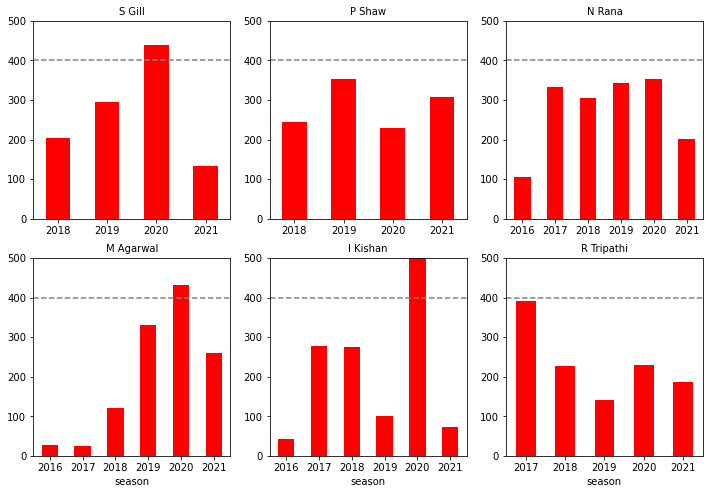

In [64]:
plt.figure(figsize = (12, 8))
plt.subplot(231)
plt.axhline(400, ls = '--', color = 'grey')
df[df.striker == 'Shubman Gill'].groupby('season')['runs_off_bat'].sum().plot(kind = 'bar', color = 'r')
plt.title('S Gill', fontsize = 10)
plt.xticks(rotation = 0)
plt.ylim(0, 500)
plt.xlabel('')

plt.subplot(232)
plt.axhline(400, ls = '--', color = 'grey')
df[df.striker == 'PP Shaw'].groupby('season')['runs_off_bat'].sum().plot(kind = 'bar', color = 'r')
plt.title('P Shaw', fontsize = 10)
plt.xticks(rotation = 0)
plt.ylim(0, 500)
plt.xlabel('')

plt.subplot(233)
plt.axhline(400, ls = '--', color = 'grey')
df[df.striker == 'N Rana'].groupby('season')['runs_off_bat'].sum().plot(kind = 'bar', color = 'r')
plt.title('N Rana', fontsize = 10)
plt.xticks(rotation = 0)
plt.xlabel('')
plt.ylim(0, 500)

plt.subplot(234)
plt.axhline(400, ls = '--', color = 'grey')
df[df.striker == 'MA Agarwal'].groupby('season')['runs_off_bat'].sum().plot(kind = 'bar', color = 'r')
plt.title('M Agarwal', fontsize = 10)
plt.xticks(rotation = 0)
plt.ylim(0, 500)

plt.subplot(235)
plt.axhline(400, ls = '--', color = 'grey')
df[df.striker == 'Ishan Kishan'].groupby('season')['runs_off_bat'].sum().plot(kind = 'bar', color = 'r')
plt.title('I Kishan', fontsize = 10)
plt.xticks(rotation = 0)
plt.ylim(0, 500)

plt.subplot(236)
plt.axhline(400, ls = '--', color = 'grey')
df[df.striker == 'RA Tripathi'].groupby('season')['runs_off_bat'].sum().plot(kind = 'bar', color = 'r')
plt.title('R Tripathi', fontsize = 10)
plt.xticks(rotation = 0)
plt.ylim(0, 500)

plt.show()

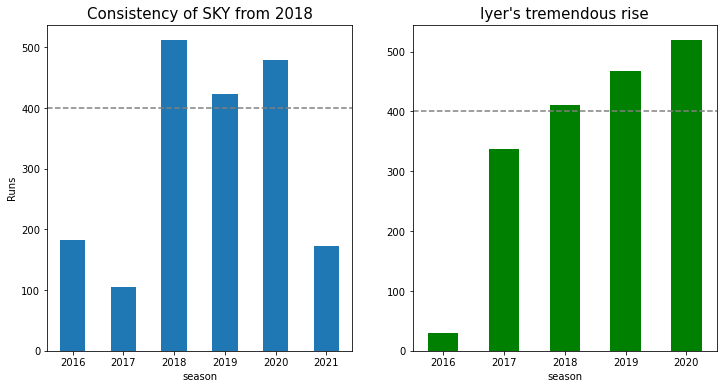

In [65]:
plt.figure(figsize = (12, 6))

plt.subplot(121)
plt.axhline(400, ls = '--', color = 'grey')
df[df.striker == 'SA Yadav'].groupby('season')['runs_off_bat'].sum().plot(kind = 'bar')
plt.title('Consistency of SKY from 2018', fontsize = 15)
plt.ylabel('Runs')
plt.xticks(rotation = 0)

plt.subplot(122)
plt.axhline(400, ls = '--', color = 'grey')
df[df.striker == 'SS Iyer'].groupby('season')['runs_off_bat'].sum().plot(kind = 'bar', color = 'g')
plt.title("Iyer's tremendous rise", fontsize = 15)
plt.xticks(rotation = 0)


plt.show()

## KL v Rohit - Recent Form against ENG

- KL Rahul  last few scores against Eng: 14, 0, 0, 1
- RG Sharma last few scores against Eng: 64, 12, 15
- Rohit's captaincy skills will be handy

## Final Top 4:
    1. Rohit Sharma
    2. Shikhar Dhawan
    3. Virat Kohli 
    4. Surya Kumar Yadav

## Middle Order: Finishers

### H Pandya, K Pandya, Pant, DK, Samson, Jadeja, S Dube, ....

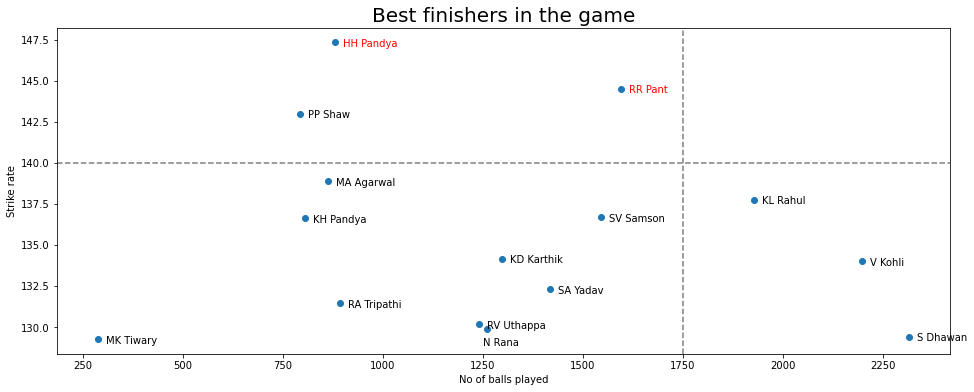

In [66]:
plot_sr_runs = sr_df[sr_df.balls > 250].sort_values('sr', ascending = False).head(15)
plot_sr_runs.reset_index(inplace = True, drop = True)

plt.figure(figsize = (16, 6))
plt.scatter(plot_sr_runs.balls, plot_sr_runs.sr)

for i in range(len(plot_sr_runs)):
    if plot_sr_runs.playerName[i] == 'V Kohli':
        plt.text(plot_sr_runs.balls[i] + 20, plot_sr_runs.sr[i] - 0.25, plot_sr_runs.playerName[i])
    elif plot_sr_runs.playerName[i] == "SK Raina":
        plt.text(plot_sr_runs.balls[i] - 150, plot_sr_runs.sr[i] - 0.25, plot_sr_runs.playerName[i])
    elif plot_sr_runs.playerName[i] == "N Rana":
        plt.text(plot_sr_runs.balls[i] - 10, plot_sr_runs.sr[i] - 1, plot_sr_runs.playerName[i])
    elif (plot_sr_runs.playerName[i] == "HH Pandya") | (plot_sr_runs.playerName[i] == "RR Pant"):
        plt.text(plot_sr_runs.balls[i] + 20, plot_sr_runs.sr[i] - 0.25, plot_sr_runs.playerName[i], color = 'red')
    else:
        plt.text(plot_sr_runs.balls[i] + 20, plot_sr_runs.sr[i] - 0.25, plot_sr_runs.playerName[i])

        
        
plt.axhline(140, ls = '--', color = 'grey')
plt.axvline(1750, ls = '--', color = 'grey')
plt.title('Best finishers in the game', fontsize = 20)
plt.xlabel('No of balls played')
plt.ylabel('Strike rate')
plt.show()

In [67]:
x6 = list(plot_sr_runs.sr)
x6.reverse()

y6 = list(plot_sr_runs.playerName)
y6.reverse()

fig = go.Figure(go.Bar(
            x = x6,
            y = y6,
            orientation='h'))

fig.update_layout(
    title="Players with most Strike rate since IPL 2016")

fig.show()

## Coming to Death overs:

In [68]:
print('Strike Rates in Death Overs')
print(tabulate(ds3[['playerName', 'strike_rate']].sort_values('strike_rate', ascending = False).head(15).reset_index(drop = True), headers = 'keys', tablefmt = 'psql'))

Strike Rates in Death Overs
+----+--------------+---------------+
|    | playerName   |   strike_rate |
|----+--------------+---------------|
|  0 | V Kohli      |       213.303 |
|  1 | RR Pant      |       199.543 |
|  2 | KL Rahul     |       197.312 |
|  3 | KD Karthik   |       180.368 |
|  4 | MS Dhoni     |       176.908 |
|  5 | HH Pandya    |       172.788 |
|  6 | R Tewatia    |       171.895 |
|  7 | KH Pandya    |       158.515 |
|  8 | V Shankar    |       156.725 |
|  9 | AR Patel     |       156.561 |
| 10 | RA Jadeja    |       156.25  |
| 11 | AT Rayudu    |       155.414 |
| 12 | YK Pathan    |       150.718 |
| 13 | MK Pandey    |       145.022 |
| 14 | DJ Hooda     |       142.529 |
+----+--------------+---------------+


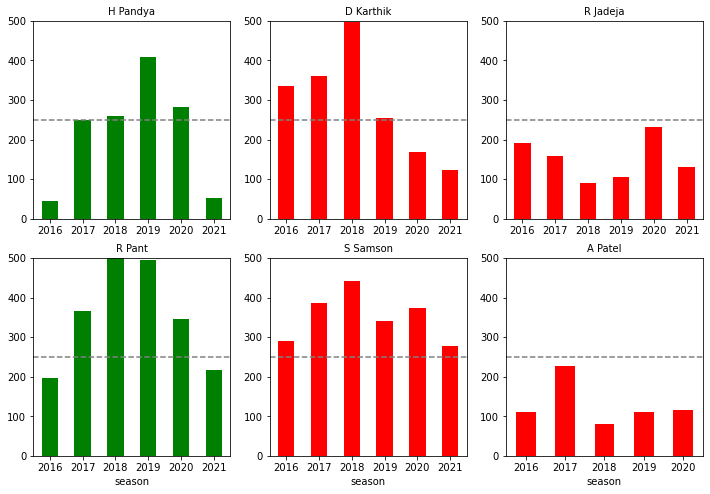

In [69]:
plt.figure(figsize = (12, 8))
plt.subplot(231)
plt.axhline(250, ls = '--', color = 'grey')
df[df.striker == 'HH Pandya'].groupby('season')['runs_off_bat'].sum().plot(kind = 'bar', color = 'g')
plt.title('H Pandya', fontsize = 10)
plt.xticks(rotation = 0)
plt.ylim(0, 500)
plt.xlabel('')

plt.subplot(232)
plt.axhline(250, ls = '--', color = 'grey')
df[df.striker == 'KD Karthik'].groupby('season')['runs_off_bat'].sum().plot(kind = 'bar', color = 'r')
plt.title('D Karthik', fontsize = 10)
plt.xticks(rotation = 0)
plt.ylim(0, 500)
plt.xlabel('')

plt.subplot(233)
plt.axhline(250, ls = '--', color = 'grey')
df[df.striker == 'RA Jadeja'].groupby('season')['runs_off_bat'].sum().plot(kind = 'bar', color = 'r')
plt.title('R Jadeja', fontsize = 10)
plt.xticks(rotation = 0)
plt.ylim(0, 500)
plt.xlabel('')

plt.subplot(234)
plt.axhline(250, ls = '--', color = 'grey')
df[df.striker == 'RR Pant'].groupby('season')['runs_off_bat'].sum().plot(kind = 'bar', color = 'g')
plt.title('R Pant', fontsize = 10)
plt.xticks(rotation = 0)
plt.ylim(0, 500)

plt.subplot(235)
plt.axhline(250, ls = '--', color = 'grey')
df[df.striker == 'SV Samson'].groupby('season')['runs_off_bat'].sum().plot(kind = 'bar', color = 'r')
plt.title('S Samson', fontsize = 10)
plt.xticks(rotation = 0)
plt.ylim(0, 500)

plt.subplot(236)
plt.axhline(250, ls = '--', color = 'grey')
df[df.striker == 'AR Patel'].groupby('season')['runs_off_bat'].sum().plot(kind = 'bar', color = 'r')
plt.title('A Patel', fontsize = 10)
plt.xticks(rotation = 0)
plt.ylim(0, 500)

plt.show()

## Final Top 6:
    1. Rohit Sharma
    2. Shikhar Dhawan
    3. Virat Kohli
    4. Surya Kumar Yadav
    5. Rishab Pant
    6. Hardik Pandya

## Lower Middle Order, Spin & Pace options:

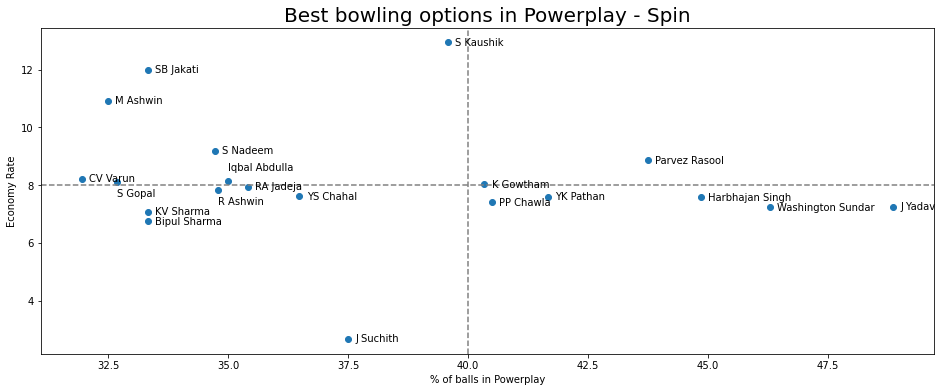

In [70]:
plt.figure(figsize = (16, 6))
plt.scatter(plot_eco_pp.pp_percentage, plot_eco_pp.economy)

for i in range(len(plot_eco_pp)):
    if plot_eco_pp.playerName[i] == 'R Ashwin':
        plt.text(plot_eco_pp.pp_percentage[i] , plot_eco_pp.economy[i] - 0.5, plot_eco_pp.playerName[i])
    elif plot_eco_pp.playerName[i] == "S Gopal":
        plt.text(plot_eco_pp.pp_percentage[i] , plot_eco_pp.economy[i] - 0.5, plot_eco_pp.playerName[i])
    elif plot_eco_pp.playerName[i] == "Iqbal Abdulla":
        plt.text(plot_eco_pp.pp_percentage[i] , plot_eco_pp.economy[i] + 0.35, plot_eco_pp.playerName[i])
    else:
        plt.text(plot_eco_pp.pp_percentage[i] + 0.15 , plot_eco_pp.economy[i] - 0.1 , plot_eco_pp.playerName[i])

        
        
plt.axhline(8, ls = '--', color = 'grey')
plt.axvline(40, ls = '--', color = 'grey')
plt.title('Best bowling options in Powerplay - Spin', fontsize = 20)
plt.xlabel('% of balls in Powerplay')
plt.ylabel('Economy Rate')
plt.show()

## Question on Spinners bowling in Powerplay!

### Clues

In [71]:
print('Most Wickets in Powerplay by Spinner')
print(tabulate(bowl_wk_pp_spin[['playerName', 'wickets']].head(10), headers = 'keys', tablefmt = 'psql'))

Most Wickets in Powerplay by Spinner
+----+-------------------+-----------+
|    | playerName        |   wickets |
|----+-------------------+-----------|
|  0 | YS Chahal         |        13 |
|  1 | Harbhajan Singh   |        13 |
|  2 | R Ashwin          |        12 |
|  3 | PP Chawla         |        11 |
|  4 | KH Pandya         |        10 |
|  5 | Washington Sundar |         9 |
|  6 | AR Patel          |         9 |
|  7 | K Gowtham         |         8 |
|  8 | S Gopal           |         7 |
|  9 | S Nadeem          |         5 |
+----+-------------------+-----------+


## Requirements:
- Counter lefties
- Ability to bat/field
- Ability to bowl in PP/Mid

## W Sundar - Matchups against Openers

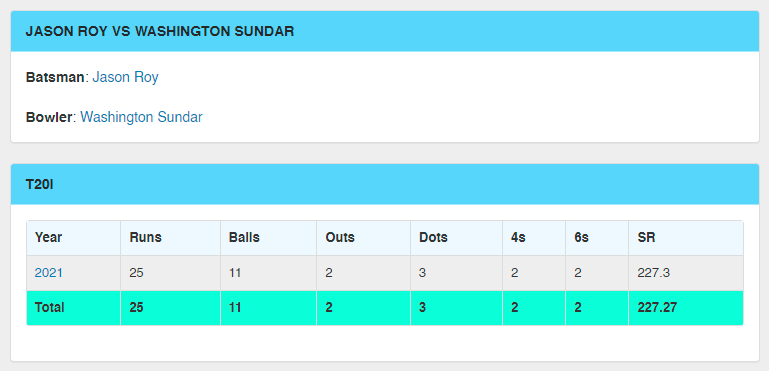

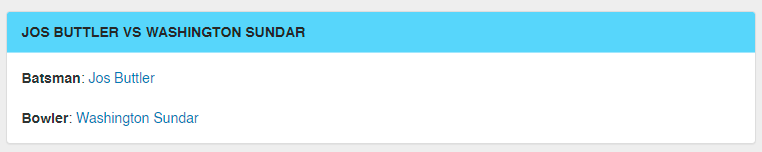

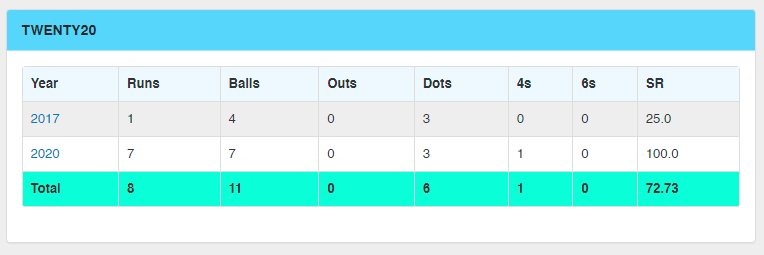

courtesy: Cricmetric

### W Sundar - way ahead of others as PP option, also handy to bat & takes the ball away from Lefties
- Alternate choice - Ashwin (track record against Lefties)

### R Jadeja - recent form, finishing ability & gun fielding
- Alternate choice - AR Patel (performance against Eng in test matches)

### other options - wrist spin / mystery spin: 
- R Chahar, Chahal, Bishnoi, Varun, 

## Final Top 8:
    1. Rohit Sharma
    2. Shikhar Dhawan
    3. Virat Kohli
    4. Surya Kumar Yadav
    5. Rishab Pant (Wk)
    6. Hardik Pandya
    7. R Jadeja
    8. Washington Sundar

## Tail

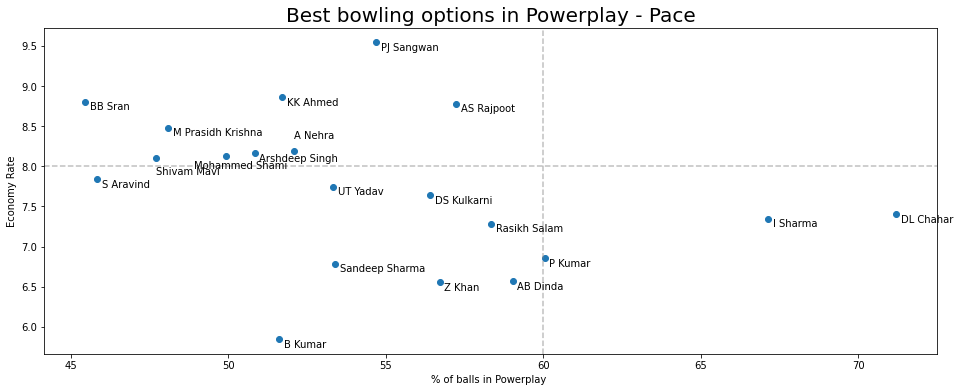

In [72]:
plt.figure(figsize = (16, 6))
plt.scatter(plot_eco_pp_pace.pp_percentage, plot_eco_pp_pace.economy)

for i in range(len(plot_eco_pp_pace)):
    if plot_eco_pp_pace.playerName[i] == 'Shivam Mavi':
        plt.text(plot_eco_pp_pace.pp_percentage[i] , plot_eco_pp_pace.economy[i] - 0.20, plot_eco_pp_pace.playerName[i])
    elif plot_eco_pp_pace.playerName[i] == "A Nehra":
        plt.text(plot_eco_pp_pace.pp_percentage[i] , plot_eco_pp_pace.economy[i] + 0.15, plot_eco_pp_pace.playerName[i])
    elif plot_eco_pp_pace.playerName[i] == "Mohammed Shami":
        plt.text(plot_eco_pp_pace.pp_percentage[i] - 1 , plot_eco_pp_pace.economy[i] - 0.15, plot_eco_pp_pace.playerName[i])
    else:
        plt.text(plot_eco_pp_pace.pp_percentage[i] + 0.15 , plot_eco_pp_pace.economy[i] - 0.1 , plot_eco_pp_pace.playerName[i])

        
        
plt.axhline(8, ls = '--', color = 'grey', alpha = 0.5)
plt.axvline(60, ls = '--', color = 'grey', alpha = 0.5)
plt.title('Best bowling options in Powerplay - Pace', fontsize = 20)
plt.xlabel('% of balls in Powerplay ')
plt.ylabel('Economy Rate')
plt.show()

In [73]:
print('Most Wickets in Powerplay by Spinner')
print(tabulate(bowl_wk_pp_pace[['playerName', 'wickets']].head(10), headers = 'keys', tablefmt = 'psql'))

Most Wickets in Powerplay by Spinner
+----+----------------+-----------+
|    | playerName     |   wickets |
|----+----------------+-----------|
|  0 | DL Chahar      |        40 |
|  1 | Sandeep Sharma |        29 |
|  2 | UT Yadav       |        28 |
|  3 | B Kumar        |        26 |
|  4 | JJ Bumrah      |        22 |
|  5 | DS Kulkarni    |        19 |
|  6 | Mohammed Siraj |        16 |
|  7 | JD Unadkat     |        14 |
|  8 | Mohammed Shami |        13 |
|  9 | SN Thakur      |        12 |
+----+----------------+-----------+


In [74]:
plot_death_eco = death_eco.sort_values('economy').head(20)
plot_death_eco.reset_index(inplace = True, drop = True)

x7 = list(plot_death_eco.economy)
x7.reverse()

y7 = list(plot_death_eco.playerName)
y7.reverse()

fig = go.Figure(go.Bar(
            x = x7,
            y = y7,
            orientation='h'))

fig.update_layout(
    title="Best economic bowlers in the Death Overs")

fig.show()

In [75]:
print('Wickets in Death Overs')
print(tabulate(bowl_wk_death[['playerName', 'wickets']], headers = 'keys', tablefmt = 'psql'))

Wickets in Death Overs
+----+----------------+-----------+
|    | playerName     |   wickets |
|----+----------------+-----------|
|  0 | JJ Bumrah      |        53 |
|  1 | B Kumar        |        41 |
|  2 | Mohammed Shami |        33 |
|  3 | JD Unadkat     |        31 |
|  4 | Sandeep Sharma |        24 |
|  5 | S Kaul         |        21 |
|  6 | SN Thakur      |        20 |
|  7 | Mohammed Siraj |        18 |
|  8 | MM Sharma      |        18 |
|  9 | UT Yadav       |        15 |
+----+----------------+-----------+


### Bumrah walks into the team any day!

Others:
- **D Chahar** - (excellent in PP, decent in Death) 
- **B Kumar** - (perfect for swinging conditions, performance against Eng)
- **Shami** - (nail yorkers, 140+)
- **T Natarajan**  - (with confidence of Aus tour)
- **M Siraj**  - (excellent IPL 2021 season)
- **N Saini**  - (high pace, low accuracy)
- **Shardul, Unadkat, Tyagi, Avesh, Harshal, Arshdeep** - (inconsistent, low experience)

## Bowlers Consistency

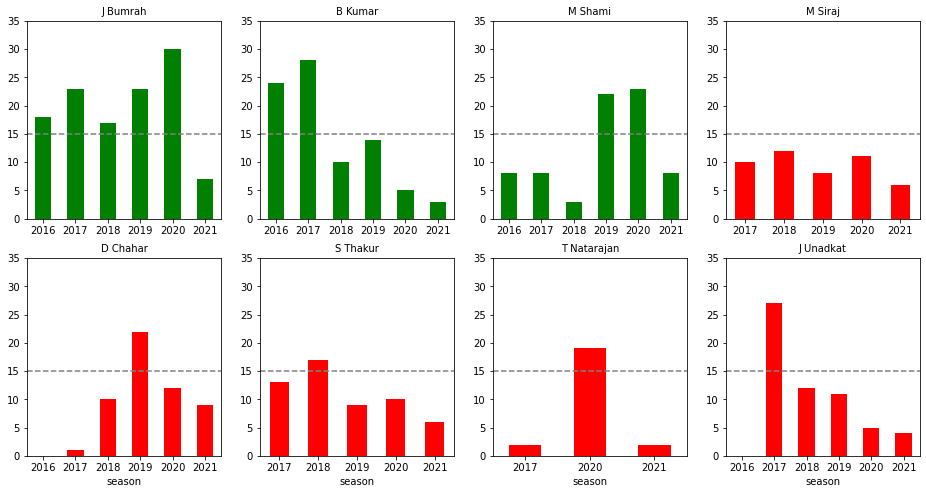

In [76]:
plt.figure(figsize = (16, 8))
plt.subplot(241)
plt.axhline(15, ls = '--', color = 'grey')
df[df.bowler == 'JJ Bumrah'].groupby('season')['isOut'].sum().plot(kind = 'bar', color = 'g')
plt.title('J Bumrah', fontsize = 10)
plt.xticks(rotation = 0)
plt.ylim(0, 35)
plt.xlabel('')

plt.subplot(242)
plt.axhline(15, ls = '--', color = 'grey')
df[df.bowler == 'B Kumar'].groupby('season')['isOut'].sum().plot(kind = 'bar', color = 'g')
plt.title('B Kumar', fontsize = 10)
plt.xticks(rotation = 0)
plt.ylim(0, 35)
plt.xlabel('')

plt.subplot(243)
plt.axhline(15, ls = '--', color = 'grey')
df[df.bowler == 'Mohammed Shami'].groupby('season')['isOut'].sum().plot(kind = 'bar', color = 'g')
plt.title('M Shami', fontsize = 10)
plt.xticks(rotation = 0)
plt.ylim(0, 35)
plt.xlabel('')

plt.subplot(244)
plt.axhline(15, ls = '--', color = 'grey')
df[df.bowler == 'Mohammed Siraj'].groupby('season')['isOut'].sum().plot(kind = 'bar', color = 'r')
plt.title('M Siraj', fontsize = 10)
plt.xticks(rotation = 0)
plt.ylim(0, 35)
plt.xlabel('')

plt.subplot(245)
plt.axhline(15, ls = '--', color = 'grey')
df[df.bowler == 'DL Chahar'].groupby('season')['isOut'].sum().plot(kind = 'bar', color = 'r')
plt.title('D Chahar', fontsize = 10)
plt.xticks(rotation = 0)
plt.ylim(0, 35)

plt.subplot(246)
plt.axhline(15, ls = '--', color = 'grey')
df[df.bowler == 'SN Thakur'].groupby('season')['isOut'].sum().plot(kind = 'bar', color = 'r')
plt.title('S Thakur', fontsize = 10)
plt.xticks(rotation = 0)
plt.ylim(0, 35)

plt.subplot(247)
plt.axhline(15, ls = '--', color = 'grey')
df[df.bowler == 'T Natarajan'].groupby('season')['isOut'].sum().plot(kind = 'bar', color = 'r')
plt.title('T Natarajan', fontsize = 10)
plt.xticks(rotation = 0)
plt.ylim(0, 35)

plt.subplot(248)
plt.axhline(15, ls = '--', color = 'grey')
df[df.bowler == 'JD Unadkat'].groupby('season')['isOut'].sum().plot(kind = 'bar', color = 'r')
plt.title('J Unadkat', fontsize = 10)
plt.xticks(rotation = 0)
plt.ylim(0, 35)

plt.show()

## India's Best XI against England (T20I) :
    1. Rohit Sharma (vc)
    2. Shikhar Dhawan
    3. Virat Kohli (c)
    4. Surya Kumar Yadav
    5. Rishab Pant (Wk)
    6. Hardik Pandya
    7. Ravindra Jadeja
    8. Washington Sundar
    9. Bhuvaneshwar Kumar
    10. Jasprit Bumrah
    11. Mohammed Shami

### Others:
S Iyer, KL Rahul, R Ashwin, D Chahar